<a href="https://colab.research.google.com/github/vk3232/Machine_learning/blob/main/ML_Expt_3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Expt: 3 Linear regression on housing data set**

**Name: Vrushabh Babasaheb Khatik**

**Roll No.: 313072**

**GR No.: 22020234**

**Batch: ML10**


Importing Necessary Libraries

In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing=pd.read_csv('/content/sample_data/housing (1).csv') #Reading dataset
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.pop('ocean_proximity') # Removing last value from index
housing.pop('total_bedrooms')

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [ ]:
# Normalizing data
hnorm=(((housing-housing.min())/(housing.max()-housing.min())))
hnorm.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
housing.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [ ]:
target = housing.pop('median_house_value')

In [ ]:
Y=target.values
X=hnorm.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y) #dividing your dataset into training dataset and validation dataset
y_train.shape

(15480,)

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(16, activation="relu",input_shape=(8,)),
keras.layers.Dense(1)
])
model.compile(loss="mae", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=3,verbose=1) # Fitting model

Epoch 1/3
484/484 [==============================] - 1s 1ms/step - loss: 196844.0625
Epoch 2/3
484/484 [==============================] - 1s 1ms/step - loss: 67155.2188
Epoch 3/3
484/484 [==============================] - 1s 1ms/step - loss: 19049.5059


In [ ]:
htest = model.evaluate(X_test, y_test) #Evaluating model

162/162 [==============================] - 0s 1ms/step - loss: 6169.3623


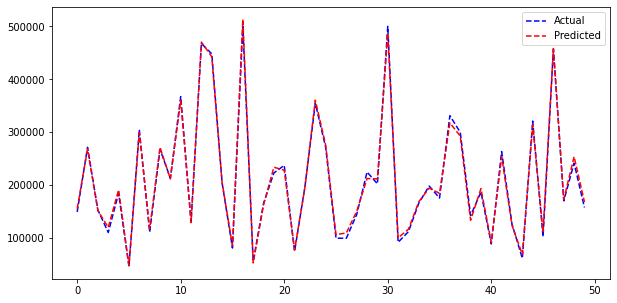

In [ ]:
# Model Prediction
X_new = X_test[:50] # pretend these are new instances
y_pred = model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(X_new),1),y_test[:50],'b--',label='Actual')
plt.plot(np.arange(0,len(X_new),1),y_pred,'r--',label='Predicted')
plt.legend()
plt.show()
plt.show()

[0.98139935]


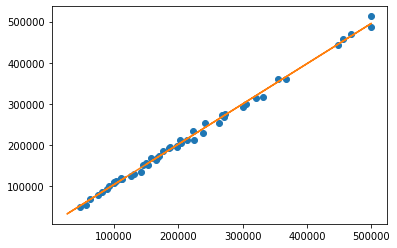

In [ ]:
X_new = X_test[:50]
plt. plot(y_test[:50],y_pred, 'o')
m, b = np. polyfit(y_test[:50],y_pred, 1) 
plt. plot(y_test, m*y_test+ b)
print(m)

**Conclusion:**            
*   In this Experiment we learn about Linear regression in which model fitting.  
*   We divide dataset by using train_test_split function.
*   Prediced model and plotted regression line.



